
Processing recording: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42
  Miniscope path found: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/15_50_39/My_V4_Miniscope


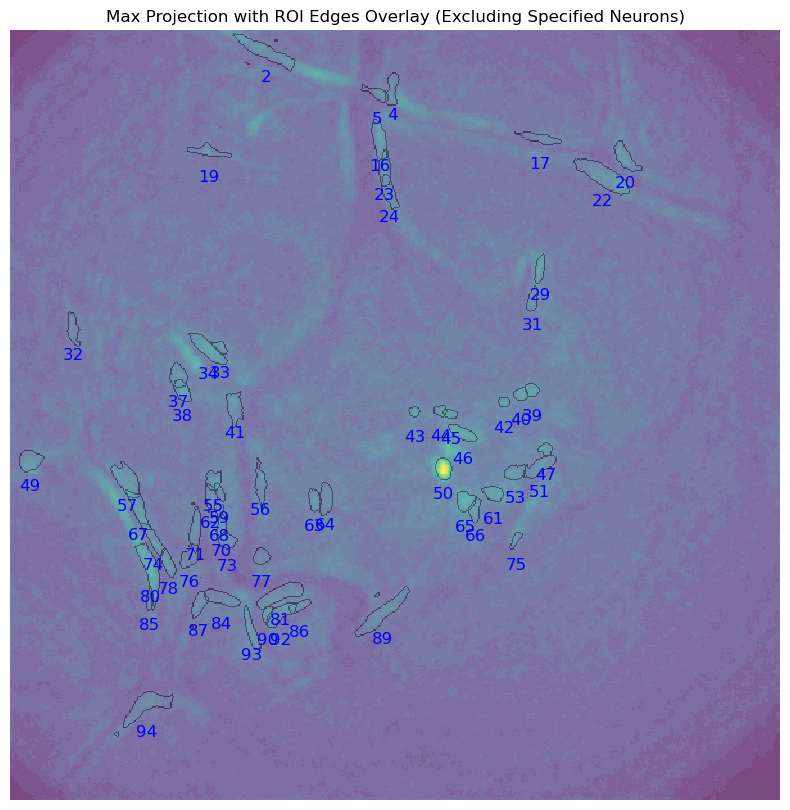

  ROI edges overlaid with exclusions (miniscope only).

Processing recording: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05
  Miniscope path found: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/17_09_14/My_V4_Miniscope


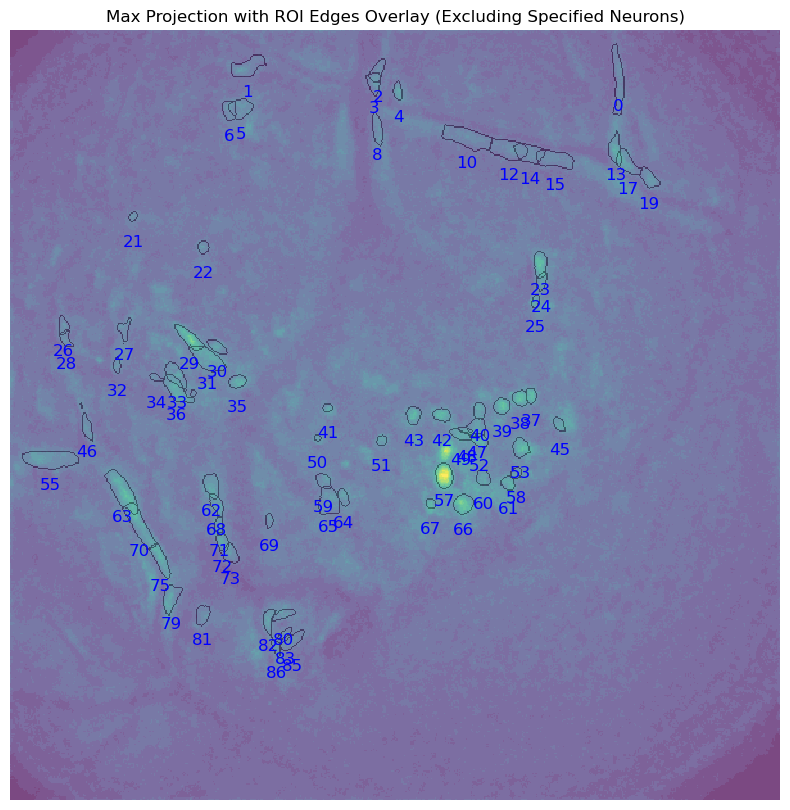

  ROI edges overlaid with exclusions (miniscope only).

Processing recording: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37
  Miniscope path found: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240916-V1-R1/customEntValHere/2024_10_14/16_38_19/My_V4_Miniscope


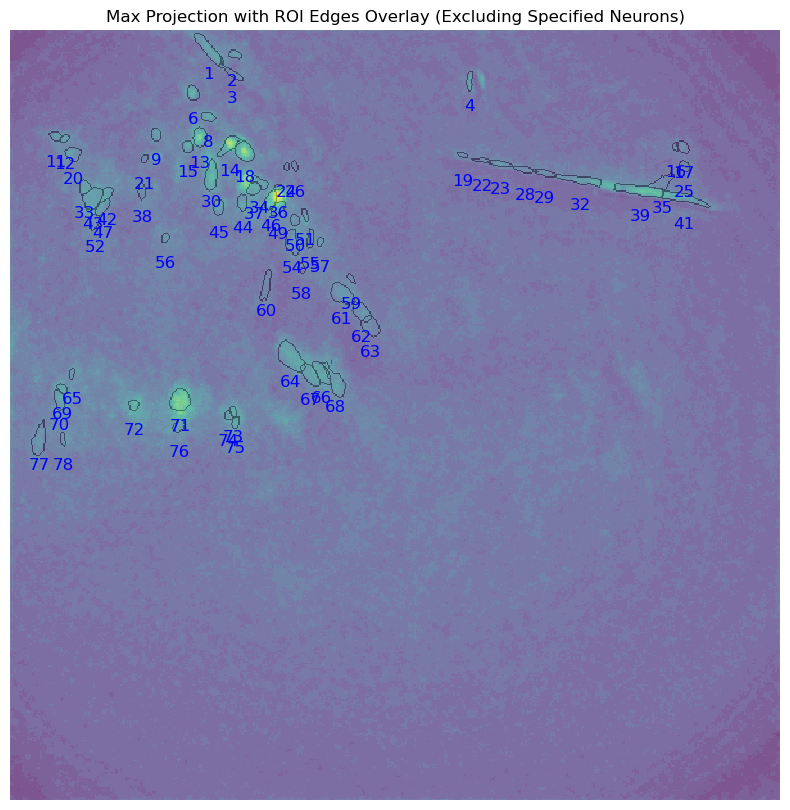

  ROI edges overlaid with exclusions (miniscope only).

Processing recording: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_53
  Miniscope path found: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240916-V1-R1/customEntValHere/2024_10_14/16_54_16/My_V4_Miniscope


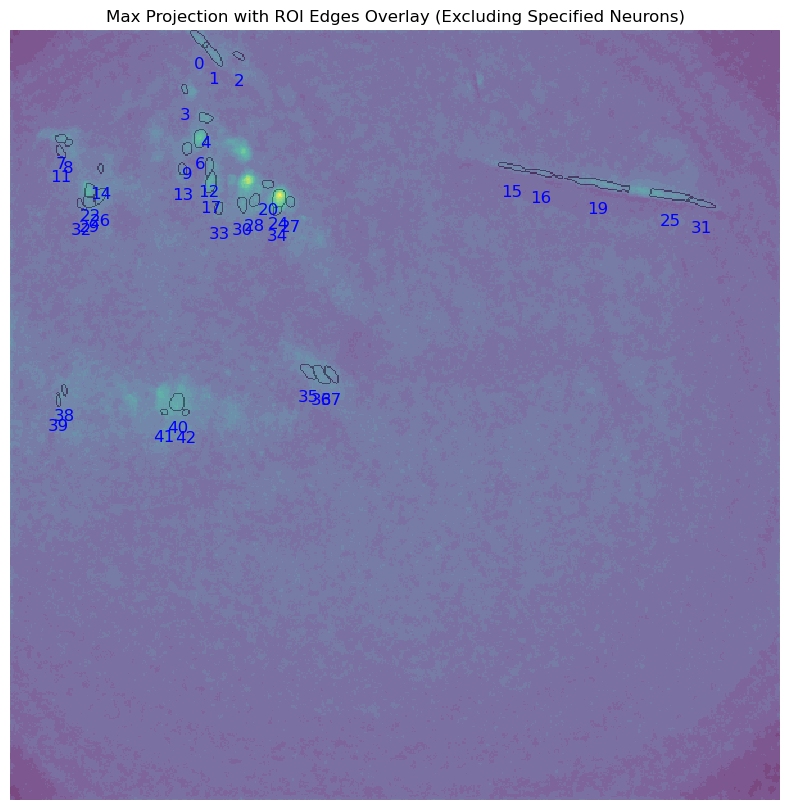

  ROI edges overlaid with exclusions (miniscope only).

Processing recording: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30
  Miniscope path found: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240916-V1-R2/customEntValHere/2024_10_14/14_23_28/My_V4_Miniscope


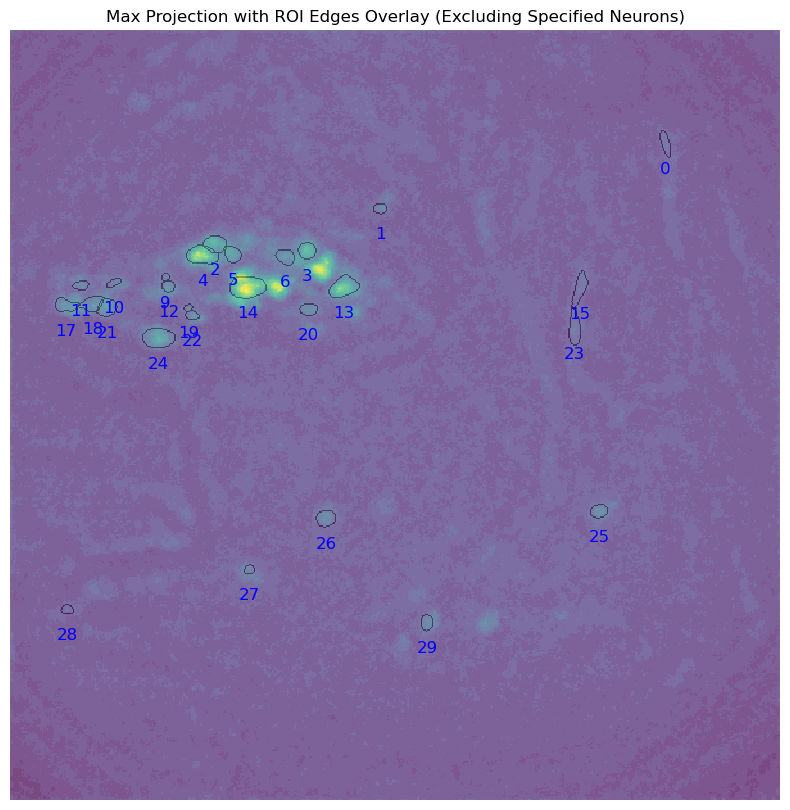

  ROI edges overlaid with exclusions (miniscope only).

Processing recording: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58
  Miniscope path found: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240916-V1-R2/customEntValHere/2024_10_14/16_03_58/My_V4_Miniscope


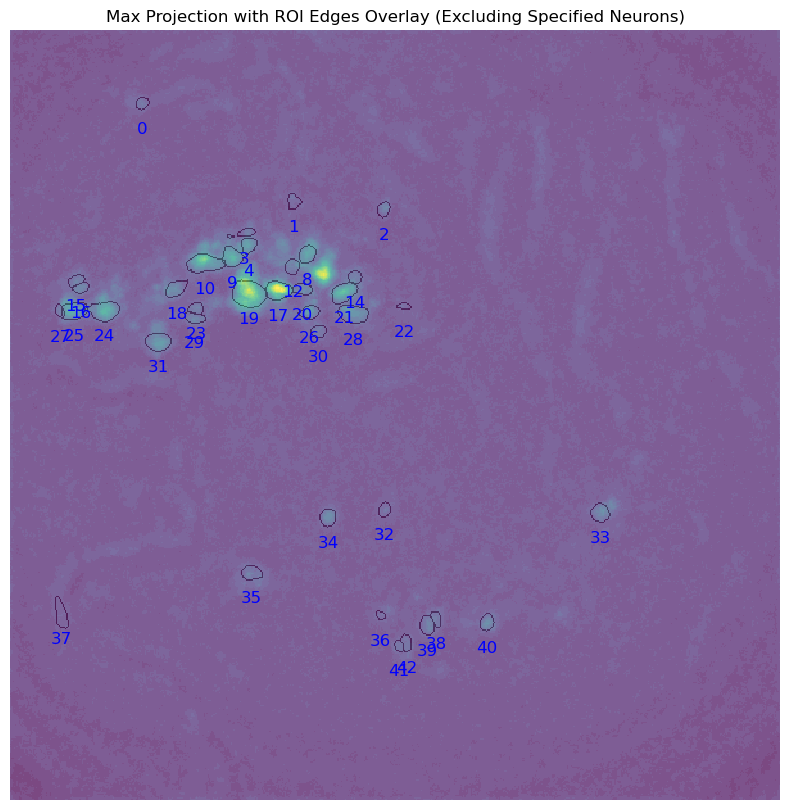

  ROI edges overlaid with exclusions (miniscope only).

Processing recording: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50
  Miniscope path found: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20240910-V1-R/customEntValHere/2024_11_01/12_52_48/My_V4_Miniscope


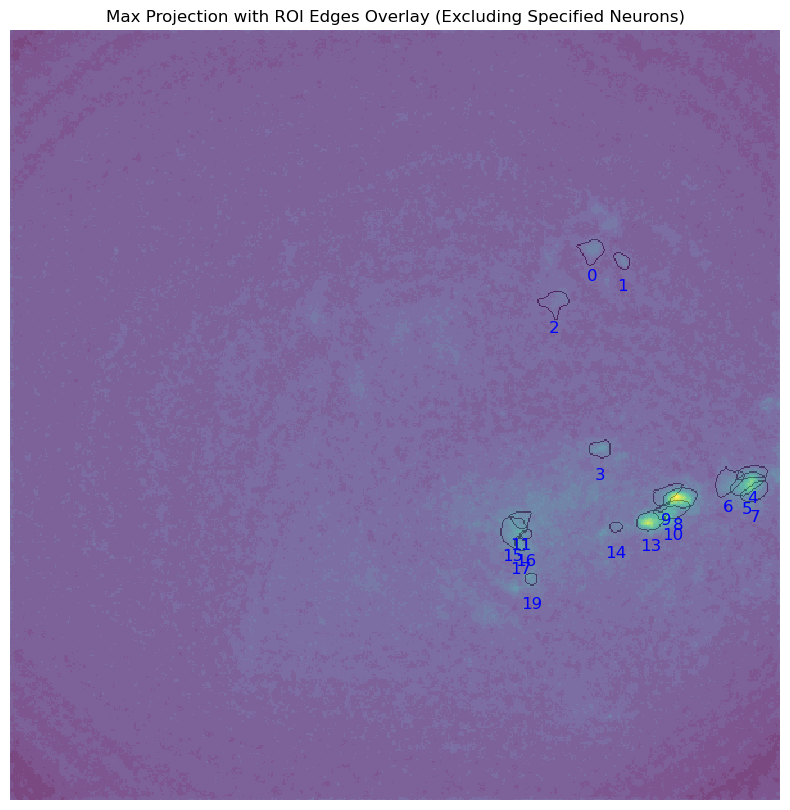

  ROI edges overlaid with exclusions (miniscope only).

Processing recording: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53
  Miniscope path found: /data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/202401015-PMC-r2/customEntValHere/2024_11_06/16_57_35/My_V4_Miniscope


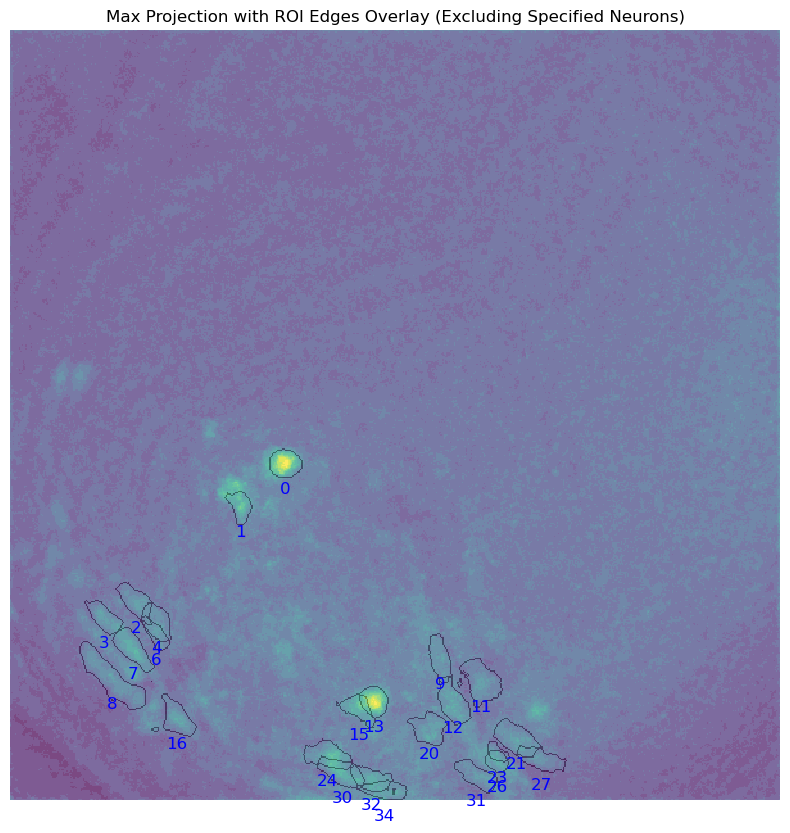

  ROI edges overlaid with exclusions (miniscope only).
Processing completed.


In [4]:
#!/usr/bin/env python3
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('../../'))

# Import your miniscope utilities.
from utlis.Ca_tools.roi_spike_vis_utlis import load_minian_data, overlay_roi_edges_exclude

# -----------------------------
# Helper: Find Miniscope Path from Mapping
# -----------------------------
def find_minian_path_for_recording(recording, mapping_data):
    """
    Given a recording identifier (e.g. '2024_10_25/20241002PMCr2_15_42'),
    search mapping_data (from mini_to_rec_mapping.json) for a miniscope path
    whose key or its associated "rec_path" field contains the session ID.
    
    Returns the miniscope path if found, else None.
    """
    session_id = recording.split('/')[-1]
    for mini_path, mapping in mapping_data.items():
        rec_field = mapping.get("rec_path") or ""
        if session_id in mini_path or session_id in rec_field:
            return mini_path
    return None

# -----------------------------
# Main Script: Example Usage
# -----------------------------
def main():
    # Define the base recording path and list of recordings.
    base_path = "/data/big_rim/rsync_dcc_sum/Oct3V1"
    recordings = [
        '2024_10_25/20241002PMCr2_15_42',
        '2024_10_25/20241002PMCr2_17_05',
        '2024_10_14/20240916v1r1_16_37',
        '2024_10_14/20240916v1r1_16_53',
        '2024_10_14/20240916v1r2_14_30',
        '2024_10_14/20240916v1r2_15_58',
        '2024_11_01/20240910V1r_AO_12_50',
        '2024_11_06/20241015pmcr2_16_53'
    ]
    
    # Load the mapping JSON.
    mapping_file = "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/mini_to_rec_mapping.json"
    with open(mapping_file, "r") as f:
        mapping_data = json.load(f)
    
    # Load the neuron exclusion JSON.
    exclude_file = "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/neuro_exclude_anshu.json"
    # "/home/lq53/mir_repos/BBOP/random_tests/25feb_more_corr_explo/neuro_exclude.json"
    with open(exclude_file, "r") as f:
        neuro_exclude = json.load(f)
    
    # Loop over each recording.
    for rec in recordings:
        rec_path = os.path.join(base_path, rec)
        print(f"\nProcessing recording: {rec_path}")
        
        # Find corresponding miniscope path.
        minian_path = find_minian_path_for_recording(rec, mapping_data)
        if minian_path is None:
            print(f"  Miniscope path not found for {rec}")
            continue
        print(f"  Miniscope path found: {minian_path}")
        
        # Construct the rec file path.
        rec_file_path = os.path.join(rec_path, "MIR_Aligned", "aligned_predictions_with_ca_and_dF_F.h5")
        
        # Get exclusions for this recording from the exclusion JSON.
        exclusions = neuro_exclude.get(rec_path, [])
        
        # --- Overlay ROI edges with exclusions (Miniscope Only) ---
        try:
            mini_timestamps = os.path.join(minian_path, 'timeStamps.csv')
            data, ts = load_minian_data(minian_path, mini_timestamps)
            overlay_roi_edges_exclude(data, data['max_proj'].values, exclusions)
            print("  ROI edges overlaid with exclusions (miniscope only).")
        except Exception as e:
            print(f"  Error overlaying ROI edges with exclusions: {e}")
    
    print("Processing completed.")

if __name__ == "__main__":
    main()
